In [1]:
from IPython.display import IFrame
import pylab as plt
%matplotlib inline
import urllib
# You only need this line if you haven't cloned the repo...if you have cloned, you'll already have the data
urllib.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
import numpy as np
# If you have cloned, make sure this is pointing to the correct file, maybe ../data/olympic100m.txt ?
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]


## Linear regression in vector and matrix format

In the previous notebook we derived the values of $w_0$ and $w_1$ that minimised the loss. If we modified our model to have a quadratic term:

$$ t_n = w_0 + w_1x_n + w_2x_n $$

resulting in more exciting bendy lines, we could do the same process:

 - Multiply out the squared loss
 - Differentiate with respect to $w_0$, $w_1$ and $w_2$
 - Set to zero
 - Solve the resulting 3 simultaneous equations
 
Life is too short for this. So, we re-pose the problem using *vectors* and *matrices*

## Definitions

We'll start with the linear model again, and define the following:

We first define $\mathbf{w},\mathbf{x}_n$ as:

$$ \mathbf{w} = \left[\begin{array}{c} w_0\\w_1\end{array}\right],~~\mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \end{array}\right] $$

and:

$$ \mathbf{t} = \left[\begin{array}{c} t_1\\ t_2\\ \vdots\\ t_N \end{array}\right] $$

and:

$$ \mathbf{X} = \left[\begin{array}{c} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T \end{array}\right] = \left[ \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots \\ 1 & x_N \end{array}\right] $$

This might all seem a bit odd (particularly the $\mathbf{X}$), but as you see in the lecture, it means we can write:

$$ \mathbf{t} = \mathbf{X}\mathbf{w} $$

and 

$$ L = \frac{1}{N}(\mathbf{t} - \mathbf{X}\mathbf{w})^T (\mathbf{t} - \mathbf{X}\mathbf{w}) $$

which can be differentiated with respect to $\mathbf{w}$ (as shown in lectures and sketched below) to give the following optimal value of $\mathbf{w}$:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

We can now construct the various objects we need...

In [2]:
X = np.hstack((np.ones_like(x),x))
t = t # This is already a vector!

And compute $\mathbf{w}$:

In [3]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print w

[[  3.64164559e+01]
 [ -1.33308857e-02]]


Now we can print the results. To do so, we need to create a matrix of test points in the same format as $\mathbf{X}$ above (people often get stuck here!)

In [4]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

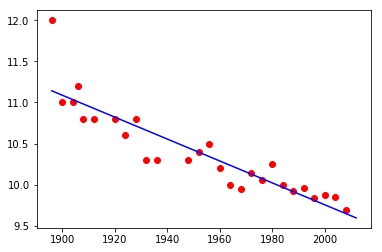

In [5]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

Phew again -- it looks just like the old version. So, what's the point?

Well, to add, say, an $x^2$ term we just need to add a column to $\mathbf{X}$ (and the test version):

$$ \mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \\ x_n^2 \end{array}\right] $$

$$ \mathbf{X} = \left[ \begin{array}{c} \mathbf{x}_1 \\ \mathbf{x}_2 \\ \vdots \\ \mathbf{x}_N\end{array}\right] = \left[ \begin{array}{ccc} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_N & x_N^2 \end{array}\right] $$

The equation for $\mathbf{w}$ doesn't change **at all**:

In [6]:
X = np.hstack((np.ones_like(x),x,x**2))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print w

[[  4.55597855e+02]
 [ -4.43160485e-01]
 [  1.10151552e-04]]


In [7]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))
testt = np.dot(testX,w)

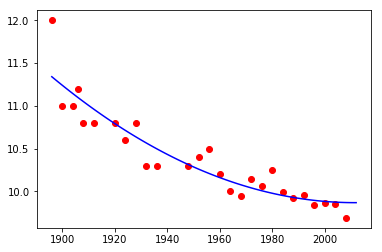

In [8]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

Bendy!

### Appendix: solving linear systems

Our expression for the optimal value of $\mathbf{w}$ is:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

Above, we have computed this by writing code to compute the right hand side. This involves performing a matrix inversion *which is almost always something to avoid* (as the matrix gets bigger, this becomes time consuming and numerically innacurate).

Instead, we can go back a step to this equation:

$$ \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T \mathbf{t} $$

This is a system of linear equations (in general: $\mathbf{A}\mathbf{z} = \mathbf{B}$) and we can solve this directly for $\mathbf{w}$ using `numpy.linalg.solve`:

In [9]:
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

In [10]:
print w

[[  4.55597856e+02]
 [ -4.43160485e-01]
 [  1.10151552e-04]]


For this system, it doesn't make any difference, but you don't have to get much bigger to see a difference.

Now, how to make the code listen to you can get however order you want?

Simply a loop!

(but we first need to rescale the x...)

<h4>Rescaling $x$</h4>
<p>We re-scale the Olympic year value to help with numerical problems when we look at high orders. Satisfy yourself that this doesn't make any difference!</p>

In [11]:
x = (x-1896)/4

<h4>Creating $\mathbf{X}$</h4>
<p>We loop up to the desired order, adding columns to $\mathbf{X}$ at each stage</p>

In [18]:
maxorder = 1
X = np.ones_like(x)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))

X = np.hstack((X,np.sin(x)))
print X

[[  0. ]
 [  1. ]
 [  2. ]
 [  2.5]
 [  3. ]
 [  4. ]
 [  6. ]
 [  7. ]
 [  8. ]
 [  9. ]
 [ 10. ]
 [ 13. ]
 [ 14. ]
 [ 15. ]
 [ 16. ]
 [ 17. ]
 [ 18. ]
 [ 19. ]
 [ 20. ]
 [ 21. ]
 [ 22. ]
 [ 23. ]
 [ 24. ]
 [ 25. ]
 [ 26. ]
 [ 27. ]
 [ 28. ]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   8.41470985e-01]
 [  1.00000000e+00   2.00000000e+00   9.09297427e-01]
 [  1.00000000e+00   2.50000000e+00   5.98472144e-01]
 [  1.00000000e+00   3.00000000e+00   1.41120008e-01]
 [  1.00000000e+00   4.00000000e+00  -7.56802495e-01]
 [  1.00000000e+00   6.00000000e+00  -2.79415498e-01]
 [  1.00000000e+00   7.00000000e+00   6.56986599e-01]
 [  1.00000000e+00   8.00000000e+00   9.89358247e-01]
 [  1.00000000e+00   9.00000000e+00   4.12118485e-01]
 [  1.00000000e+00   1.00000000e+01  -5.44021111e-01]
 [  1.00000000e+00   1.30000000e+01   4.20167037e-01]
 [  1.00000000e+00   1.40000000e+01   9.90607356e-01]
 [  1.00000000e+00   1.50000000e+01   6.50287840e-01]


<p>Solve the system...</p>

In [13]:
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
print(w)

[[ 11.11676486]
 [ -0.05262998]
 [  0.07820933]]


Create a test set in the same manner as $\mathbf{X}$...

In [14]:
x_test = np.linspace(0,30,100)[:,None]
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X_test = np.hstack((X_test,x_test**i))
X_test = np.hstack((X_test,np.sin(x_test)))
f_test = np.dot(X_test,w)

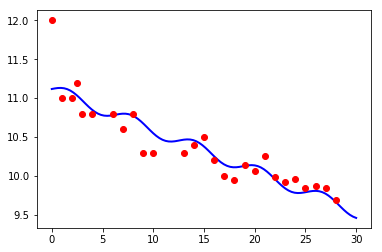

In [15]:
import pylab as plt
%matplotlib inline
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t,'ro')clf = clf.fit(X, Y)

In [1]:
import numpy as np
# Load training and testing data
X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:, 1]
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")

In [ ]:
def reduce_array(X):
    reduced_array=[]
    for i in range(0,len(X)):
        to_append=[]
        for j in range(0,20):
            to_append.append((X[i][j]+X[i][j+1]+X[i][j+2])/3)
        for j in range(60,len(X[0])):
            to_append.append(X[i][j])
        reduced_array.append(to_append)
    reduced_array=np.asarray(reduced_array)
    return(reduced_array)
def average_array(X,power):
    average=[]
    for i in range(0,len(X[0])):
        to_append=0
        for j in range(1,len(X)):
            to_append=to_append+(X[j][i]**power)
        to_append=to_append/(len(X))
        to_append=to_append**(1/5)
        average.append(to_append)
    return average
def binary_array(X,average):
    X_binary=[]
    for i in range(0, len(X)):
        to_append=[]
        for j in range(0,len(X[0])):
            if(X[i][j]<=average[j]):
                to_append.append(0)
            else:
                to_append.append(1)
        X_binary.append(to_append)
    return X_binary

train_reduce=reduce_array(X_train)
test_reduce=reduce_array(X_test)
X_train_binary=binary_array(X_train,average_array(X_train,5))
X_test_binary=binary_array(X_test,average_array(X_test,5))
train_reduce_binary=binary_array(train_reduce,average_array(train_reduce,5))
test_reduce_binary=binary_array(test_reduce,average_array(test_reduce,5))
train_binary_reduce=reduce_array(X_train_binary)
test_binary_reduce=reduce_array(X_test_binary)

from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_train_binary, y_train)
y_pred=model.predict(X_test_binary)
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('GradientBoostingClassifier.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")


model.fit(train_reduce_binary, y_train)
y_pred=model.predict(test_reduce_binary)
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('GradientBoostingClassifierReduceBinary.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")

model.fit(train_binary_reduce, y_train)
y_pred=model.predict(test_binary_reduce)
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('GradientBoostingClassifierBinaryRedcued.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")


from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_binary = gnb.fit(X_train_binary, y_train).predict(X_test_binary)
y_pred= gnb.fit(X_train, y_train).predict(X_test)
to_print="Id,EpiOrStroma\n"
for i in range(0,len(y_pred_binary)):
    to_print=to_print+str(i)+","+str(int(y_pred_binary[i]))+"\n"
fh=open("Naive_Bayes_binary.csv","w")
fh.write(to_print)
fh.close()




In [84]:
# in 0 based indexing, ratio.layer.3 is 11 and GLCM.Ang..2nd.moment..quick.8.11..Layer.1..all.dir.. is 101.
answers=[]
correct=0
ratio_value=0.42
GLCM_value=0.001
#current best result
for i in range(0,len(X_train)):
    if(X_train[i][11]>=ratio_value):
        if(X_train[i][101]<GLCM_value):
            answers.append(1)
        else:
            answers.append(2)
    else:
        answers.append(2)
    if(answers[-1]==y_train[i]):
        correct=correct+1
print(correct)
test=[]
for i in range(0,len(X_test)):
    if(X_test[i][11]>=ratio_value):
        if(X_test[i][101]<GLCM_value):
            test.append(1)
        else:
            test.append(2)
    else:
        test.append(2)

        
        
to_print="Id,EpiOrStroma\n"
for i in range(0,len(test)):
    to_print=to_print+str(i)+","+str(test[i])+"\n"
fh=open("answer.csv","w")
fh.write(to_print)
fh.close()

528


In [5]:
fh=open("train.csv","w")
to_print="Ratio 3, GCLM ang,EpiOrStroma\n"
for i in range(0,len(X_train)):
    to_print=to_print+str(X_train[i][11])+","+str(X_train[i][101])+","+str(int(y_train[i]))+"\n"
fh.write(to_print)

In [16]:
fh=open("training.csv","w")
to_print=[]
for i in range(0,len(X_train)):
    to_print.append([X_train[i][11],X_train[i][101]])
test_print=[]
for i in range(0,len(X_test)):
    test_print.append([X_test[i][11],X_test[i][101]])


average=[]
for i in range(0,len(to_print[0])):
    to_append=0
    for j in range(1,len(to_print)):
        to_append=to_append+((to_print[j])[i]**5)
    to_append=to_append/(len(to_print)-1)
    to_append=to_append**(1/5)
    average.append(to_append)
    
    
X_train_binary=[]
for i in range(0, len(to_print)):
    to_append=[]
    for j in range(0,len(to_print[0])):
        if(to_print[i][j]<=average[j]):
            to_append.append(0)
        else:
            to_append.append(1)
    X_train_binary.append(to_append)
    

X_test_binary=[]
for i in range(0, len(test_print)):
    to_append=[]
    for j in range(0,len(test_print[0])):
        if(test_print[i][j]<=average[j]):
            to_append.append(0)
        else:
            to_append.append(1)
    X_test_binary.append(to_append)




from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
print(len(X_train_binary),len(y_train))
gnb = GaussianNB()
y_pred_binary = gnb.fit(to_print, y_train).predict(test_print)
to_print="Id,EpiOrStroma\n"
for i in range(0,len(y_pred_binary)):
    to_print=to_print+str(i)+","+str(int(y_pred_binary[i]))+"\n"
fh=open("Naive_Bayes_binary.csv","w")
fh.write(to_print)
fh.close()

(600, 600)


In [33]:
array='Mean.Layer.1,Mean.Layer.2,Mean.Layer.3,Standard.deviation.Layer.1,Standard.deviation.Layer.2,Standard.deviation.Layer.3,Skewness.Layer.1,Skewness.Layer.2,Skewness.Layer.3,Ratio.Layer.1,Ratio.Layer.2,Ratio.Layer.3,Min..pixel.value.Layer.1,Min..pixel.value.Layer.2,Min..pixel.value.Layer.3,Max..pixel.value.Layer.1,Max..pixel.value.Layer.2,Max..pixel.value.Layer.3,Mean.of.inner.border.Layer.1,Mean.of.inner.border.Layer.2,Mean.of.inner.border.Layer.3,Mean.of.outer.border.Layer.1,Mean.of.outer.border.Layer.2,Mean.of.outer.border.Layer.3,Border.Contrast.Layer.1,Border.Contrast.Layer.2,Border.Contrast.Layer.3,Contrast.to.neighbor.pixels.Layer.1..3.,Contrast.to.neighbor.pixels.Layer.2..3.,Contrast.to.neighbor.pixels.Layer.3..3.,Edge.Contrast.of.neighbor.pixels..Prototype..Layer.1..3.,Edge.Contrast.of.neighbor.pixels..Prototype..Layer.2..3.,Edge.Contrast.of.neighbor.pixels..Prototype..Layer.3..3.,StdDev..to.neighbor.pixels.Layer.1..3.,StdDev..to.neighbor.pixels.Layer.2..3.,StdDev..to.neighbor.pixels.Layer.3..3.,Circular.Mean.Layer.1..R1..User..3..R2..Same...R1...border.,Circular.Mean.Layer.2..R1..User..3..R2..Same...R1...border.,Circular.Mean.Layer.3..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Layer.1..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Layer.2..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Layer.3..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Mean.Layer.1..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Mean.Layer.2..R1..User..3..R2..Same...R1...border.,Circular.StdDev.Mean.Layer.3..R1..User..3..R2..Same...R1...border.,Mean.Diff..to.neighbors.Layer.1..0.,Mean.Diff..to.neighbors.Layer.2..0.,Mean.Diff..to.neighbors.Layer.3..0.,Mean.Diff..to.neighbors..abs..Layer.1..0.,Mean.Diff..to.neighbors..abs..Layer.2..0.,Mean.Diff..to.neighbors..abs..Layer.3..0.,Rel..border.to.brighter.objects.Layer.1,Rel..border.to.brighter.objects.Layer.2,Rel..border.to.brighter.objects.Layer.3,Mean.diff..to.scene.Layer.1,Mean.diff..to.scene.Layer.2,Mean.diff..to.scene.Layer.3,Ratio.to.scene.Layer.1,Ratio.to.scene.Layer.2,Ratio.to.scene.Layer.3,HSI.Transformation.Hue.R.Layer.1.G.Layer.2.B.Layer.3.,Area..Pxl.,Border.length..Pxl.,Length..mu_m.,Length.Width,Number.of.pixels,Rel..Border.to.Image.Border,Volume..Pxl.,Width..mu_m.,Asymmetry,Border.index,Compactness,Density,Elliptic.Fit,Radius.of.largest.enclosed.ellipse,Radius.of.smallest.enclosing.ellipse,Rectangular.Fit,Roundness,Shape.index,Area..excluding.inner.polygons...Pxl.,Area..including.inner.polygons...Pxl.,Average.length.of.edges..polygon...Pxl.,Compactness..polygon.,Length.of.longest.edge..polygon...Pxl.,Number.of.edges..polygon.,Number.of.inner.objects..polygon.,Perimeter..polygon...Pxl.,Stddev.of.length.of.edges..polygon...Pxl.,Mean.of.sub.objects..stddev.Layer.1..1.,Area.of.sub.objects..mean..1...Pxl.,Area.of.sub.objects..stddev..1...Pxl.,Density.of.sub.objects..mean..1.,Density.of.sub.objects..stddev..1.,Asymmetry.of.sub.objects..mean..1.,Asymmetry.of.sub.objects..stddev..1.,Direction.of.sub.objects..mean..1.,Direction.of.sub.objects..stddev..1.,GLCM.Homogeneity..quick.8.11..Layer.1..all.dir..,GLCM.Contrast..quick.8.11..Layer.1..all.dir..,GLCM.Dissimilarity..quick.8.11..Layer.1..all.dir..,GLCM.Entropy..quick.8.11..Layer.1..all.dir..,GLCM.Ang..2nd.moment..quick.8.11..Layer.1..all.dir..,GLCM.Mean..quick.8.11..Layer.1..all.dir..,GLCM.StdDev..quick.8.11..Layer.1..all.dir..,GLCM.Correlation..quick.8.11..Layer.1..all.dir..,Number.of.sub.objects.Nucleus..1.,Number.of.sub.objects.Dark..1.,Area.of.sub.objects.Nucleus..1...Pxl.,Area.of.sub.objects.Dark..1...Pxl.,Rel..area.of.sub.objects.Nucleus..1.,Rel..area.of.sub.objects.Dark..1.,Rel..area.of.sub.objects.unclassified..1.'
vari=array.split(",")
for i in range(0,len(vari)):
    #if(vari[i]=='Ratio.to.scene.Layer.3,HSI.Transformation.Hue.R.Layer.1.G.Layer.2.B.Layer.3.'):
    
    print(vari[i],i)

('Mean.Layer.1', 0)
('Mean.Layer.2', 1)
('Mean.Layer.3', 2)
('Standard.deviation.Layer.1', 3)
('Standard.deviation.Layer.2', 4)
('Standard.deviation.Layer.3', 5)
('Skewness.Layer.1', 6)
('Skewness.Layer.2', 7)
('Skewness.Layer.3', 8)
('Ratio.Layer.1', 9)
('Ratio.Layer.2', 10)
('Ratio.Layer.3', 11)
('Min..pixel.value.Layer.1', 12)
('Min..pixel.value.Layer.2', 13)
('Min..pixel.value.Layer.3', 14)
('Max..pixel.value.Layer.1', 15)
('Max..pixel.value.Layer.2', 16)
('Max..pixel.value.Layer.3', 17)
('Mean.of.inner.border.Layer.1', 18)
('Mean.of.inner.border.Layer.2', 19)
('Mean.of.inner.border.Layer.3', 20)
('Mean.of.outer.border.Layer.1', 21)
('Mean.of.outer.border.Layer.2', 22)
('Mean.of.outer.border.Layer.3', 23)
('Border.Contrast.Layer.1', 24)
('Border.Contrast.Layer.2', 25)
('Border.Contrast.Layer.3', 26)
('Contrast.to.neighbor.pixels.Layer.1..3.', 27)
('Contrast.to.neighbor.pixels.Layer.2..3.', 28)
('Contrast.to.neighbor.pixels.Layer.3..3.', 29)
('Edge.Contrast.of.neighbor.pixels..Proto